In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
#load the mnist dataset using tensorflows keras api
#assign the training and test data to the respective variables


#loaddata is a method that returns it as a tuple of two tuples
#first tuples has the training data
#second tuple is the test data


#then seperates the two tuples into 4 variables.

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
#scale down the values of the pixels from 0-255 to 0-1


train_images = train_images/255.0 #divides each pixel value in the array by 255 which is the max pixel value. then scales it down to 0-1
test_images = test_images/255.0

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 ... 5 6 8]


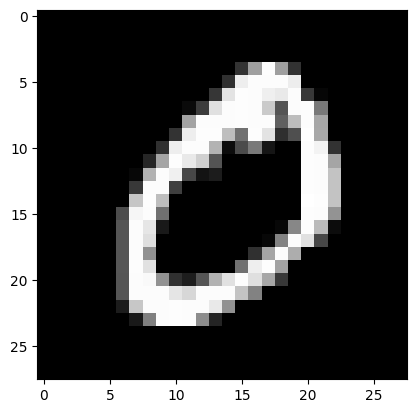

In [ ]:
#visualize the data
print(train_images.shape)
print(test_images.shape)
print(train_labels)

#display first image in the training set
plt.imshow(train_images[0],cmap='gray')
plt.imshow(train_images[1],cmap='gray')
# plt.imshow(train_images[2],cmap='gray')
# plt.imshow(train_images[3],cmap='gray')
# plt.imshow(train_images[4],cmap='gray')
# plt.imshow(train_images[5],cmap='gray')
# plt.imshow(train_images[6],cmap='gray')
# plt.imshow(train_images[7],cmap='gray')
# plt.imshow(train_images[8],cmap='gray')
# plt.imshow(train_images[9],cmap='gray')

plt.show()

(60000, 28, 28)
shape of the training data set = train images
there are 60k images in the ds
dimensions are 28 x 28 pixels in wxh
(10000, 28, 28)
this is for test images
10k images, same wxh
[5 0 4 ... 5 6 8]
labels of the training dataset
each number corresponds to the label/class of the respective image in the training dataset  

first image is 5
second is 0
third 9
these labels show the digit represented by each image from 0 to 9

In [ ]:
# define the neural network

#allows us to build a neural network layer by layer
myModel = tf.keras.models.Sequential()

#adds a flatten layer to the model.
#transforms the 28x28 pixel images to a 1d array of 784 pixes
myModel.add(tf.keras.layers.Flatten(input_shape=(28,28)))

#adds a fully connected dense layer with 128 units and ReLU activation function
myModel.add(tf.keras.layers.Dense(128,activation='relu'))

#adds an output layer with 10 units since there are 10 classes in the MNIST dataset
myModel.add(tf.keras.layers.Dense(10,activation='softmax'))

#compile the model

#adam is an optimization algorithm
#loss function to be used for training
myModel.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

#iterations over the dataset = 20
myModel.fit(train_images, train_labels, epochs=20)




Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1579 - accuracy: 0.7091
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4740 - accuracy: 0.8767
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3736 - accuracy: 0.8975
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3347 - accuracy: 0.9052
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3123 - accuracy: 0.9104
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2964 - accuracy: 0.9154
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2832 - accuracy: 0.9181
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2718 - accuracy: 0.9218
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2614 - accuracy: 0.9245
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.251

In [ ]:
#check the model accuracy on teh test data

val_loss, val_acc = myModel.evaluate(test_images, test_labels)
print('test accuracy: ' , val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 25.0616 - accuracy: 0.9219
test accuracy:  0.9218999743461609


In [ ]:
#how to save this model with the same performance to use somewhere else

myModel.save("mnist_model")

In [ ]:
#load the model from the file system
myNewModel = tf.keras.models.load_model('mnist_model')

In [ ]:
#check the new model for accuracy
newValueLoss, newValAcc = myModel.evaluate(test_images,test_labels)
print("new test accuracy: ", newValAcc)

313/313 [==============================] - 1s 2ms/step - loss: 25.0616 - accuracy: 0.9219
new test accuracy:  0.9218999743461609
